In [9]:
from finiteelementanalysis import discretization as disc
from finiteelementanalysis import discretization_demo_helper_fcns as di_demo
import numpy as np




Discretization
--------------

This following tutorial will provide an overview for the implementation of *D2_nn6_tri* elements, also known as 6-node quadratic triangular elements. <br>

Compared to its simpler counterpart *D2_nn3_tri* which has only 3 nodes and 1 Gauss point, *D2_nn6_tri* has the ability to capture complicated shapes and boundaries with more accuracy, but with added computational cost. <br>

In the cell below is the triangular element plotted in its natural coordinates. This element has 6 nodes and 4 Gaussian integration points. <br>

Definition:<br>
*Natural Coordinates* - Also known as isoparametric coordinates. This is a standardized coordinate system that ranges from (0,1) across the width and height of the triangular element. <br>
In the simplest triangular element, there are nodes at each vertex of the triangle and a single Gauss point at the center of mass of the triangle. <br>
In the 6 node triangular element, there are additional nodes at the halfway point of each side of the triangle. 3 additional Gauss points are included. See graphic below for the arrangement of these additional Gauss points. <br>

Natural Coordinates allow for increased simplicity in the numerical implementation of Finite Element Analysis. Specifically, they allow for the use of shape functions.<br>





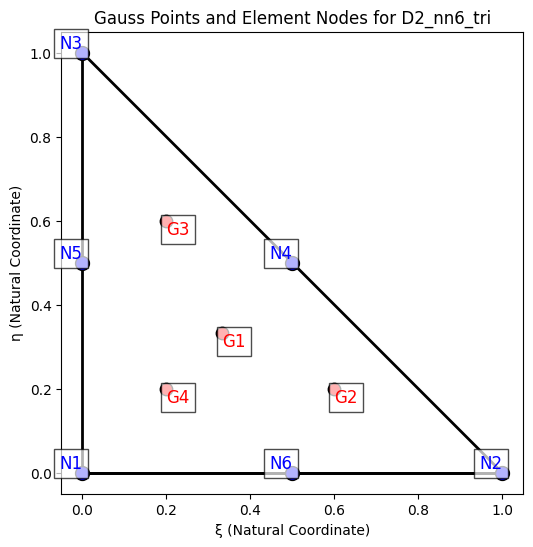

In [8]:
elem = "D2_nn6_tri"
num_gauss_pts = 4
fname = "D2_nn6_tri_4gp.png"
di_demo.visualize_gauss_pts(fname, elem, num_gauss_pts)




Shape Functions
---------------

Definition: <br>
*Shape Functions*: Shape functions are polynomial functions which describe how a field variable varies within a given element. Each shape function is associated with its own node and has a value of 1 on the exact node and 0 at all other nodes. <br> 
*eg*. <br>
N1($\xi$, $\eta$) = N1(0, 0) = 1 <br> 
N1(0.5, 1) = 0 <br>

The quadratic shape functions are: <br>
        N1($\xi$, $\eta$) = ($2\xi$ - 1) * $\xi$ <br>
        N2($\xi$, $\eta$) = ($2\eta$ - 1) * $\eta$ <br>
        N3($\xi$, $\eta$) = ($2\xi_c$ - 1) * $\xi_c$ <br>
        N4($\xi$, $\eta$) = $4\xi\eta$ <br>
        N5($\xi$, $\eta$) = $4\eta\xi_c$ <br>
        N6($\xi$, $\eta$) = $4\xi_c\xi$ <br>
      where $\xi_c$ = 1 - $\xi$ - $\eta$ (complementary coordinate for the third node). <br><br>

The use of natural coordinates allows these shape functions to be independent of the the element's actual size or orientation. This is particularly useful when doing numerical integration, a key part of interpolation. <br><br>

Interpolation using Shape Functions
-----------------------------------

Given field values for each node of the element, $f_i$, the interpolated field value at any position 
$(\xi, \eta)$ within the element can be determined with the following formula: <br>
$f(\xi, \eta) = \sum\limits_{i=1}^N N_i(\xi, \eta)f_i$ <br>
Where $N_i$ is the shape function corresponding to the $i^{th}$ node. <br><br>

Plotted below is the interpolated field for the function "fcn". 




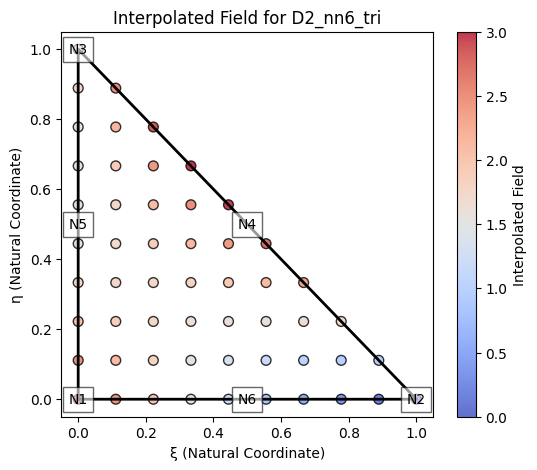

In [11]:
def fcn(xi, eta):
    return 2.0*xi + 3.0*eta + 1.5*xi*eta

elem
node_coords = np.array([[0,0],[1,0],[0,1],[0.5,0.5],[0,0.5],[0.5,0]])
node_vals = np.array([fcn(xi,eta) for xi, eta in node_coords])

fname = elem + "_interpolate_fcn.png"
di_demo.plot_interpolate_field_natural_coords_single_element(fname, elem, node_vals)



Isoparametric Mapping
---------------------

Isoparametric mapping provides a systematic way to map between the natural and physical coordinate systems. Using the same shape functions that allow for the interpolation of field values onto the element, we are able to interpolate from the natural coordinate system to the element's physical geometry. <br>
*e.g.* <br>
$(\xi, \eta) \rightarrow (x, y) $ <br><br>

This mapping can be done by using the following formulas: <br>
$x(\xi, \eta) = \sum\limits_{i=1}^N N_i(\xi, \eta)x_i$ <br>
$y(\xi, \eta) = \sum\limits_{i=1}^N N_i(\xi, \eta)y_i$ <br>
Where $x_i, y_i$ are the physical coordinates of the $i^{th}$  node and $N_i$ is the shape function corresponding to the $i^{th}$ node. <br><br>

Plotted below is the original element from above, mapped to its physical coordinates.

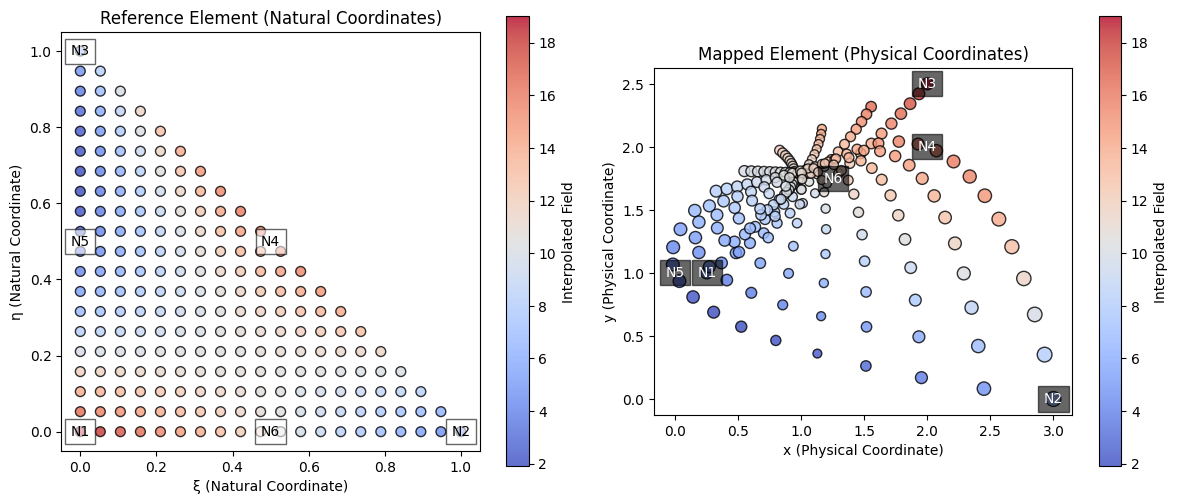

In [22]:
elem
node_coords_phys = np.array([[0.25,1],[3,0],[2,2.5],[2,2],[0,1],[1.25,1.75]])
node_vals_phys = np.array([fcn(x,y) for x,y in node_coords_phys])
fname = elem + "_interpolate_fcn_physical_coords.png"
di_demo.visualize_isoparametric_mapping_single_element(str(fname), elem, node_coords_phys, node_vals_phys)